# Project: How Health Risk Factors Affect Healthcare Costs

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The purpose of this report is to compare how certain risk factors affect both individual healthcare costs and the overall healthcare costs of a country. The data sets used in this analysis were obtained from <a href="https://www.gapminder.org/data/">GapMinder</a>. Data sets were downloaded as Excel spreadsheets and specific columns were selected to fit the needs of the analysis. Data from 40 countries was selected from across the world from 2002 (Alcohol consumption data is from 2005 due to no data from 2002.) 

### This analysis compares the consumption of 3 risk factors:

<ol>
    <li>Alcohol (Average amount of liters consumed per adult (+15))</li>
    <li>Sugar (Average amount of grams consumed per person)</li>
    <li>Tobacco (Percent of adult (+15) population that smoke tobacco)</li>
</ol>

### Health risk factors are analyzed together and individually with two types of healthcare costs:

<ol>
    <li>Individual healthcare costs (US Dollars)</li>
    <li>Overall healthcare costs (Percentage of healthcare costs of a country's GDP)</li>
</ol>

### There are 2 questions to be addressed:

<ol>
    <li>Do countries with higher rates of consumption of risk factors have higher healthcare costs?</li>
    <li>Which health risk factor contributes to healthcare costs the most?</li>
</ol>




### 1. Import Python Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, data is loaded, checked for cleanliness, and then trimmed and cleaned for analysis. 

### 2. Load Data

In [3]:
df = pd.read_csv('health_risks_costs.csv')
df.head(10)

,country,year,alcohol_con,sugar_con,tobacco_con,cost_per_person,health_cost_by_gdp
0,Argentina,2002,10.00,126.03,30.0,225.36,8.32
1,Australia,2002,10.02,126.03,24.8,1846.88,8.36
2,Bolivia,2002,5.12,76.71,31.7,59.70,6.53
3,Brazil,2002,9.16,150.69,NaN,203.09,7.19
4,Cambodia,2002,4.77,21.92,23.6,25.03,7.49
5,Canada,2002,9.77,167.12,21.6,2249.07,9.60
6,China,2002,5.91,19.18,31.8,54.09,4.81
7,Costa Rica,2002,5.55,158.90,16.8,316.34,7.65
8,Cuba,2002,5.51,164.38,35.9,194.80,6.50
9,Denmark,2002,13.37,161.64,33.4,3018.62,9.33


### 3. Check the size of the data and how many null values it contains

In [4]:
df.shape

(40, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
country               40 non-null object
year                  40 non-null int64
alcohol_con           40 non-null float64
sugar_con             40 non-null float64
tobacco_con           37 non-null float64
cost_per_person       38 non-null float64
health_cost_by_gdp    39 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.3+ KB


## Data Cleaning 

> Data is cleaned so that there are no null values.

### 4. Null values are dropped and the data frame is renamed to reflect the change

In [6]:
df_clean = df.dropna(axis=0, inplace=False)
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 38
Data columns (total 7 columns):
country               35 non-null object
year                  35 non-null int64
alcohol_con           35 non-null float64
sugar_con             35 non-null float64
tobacco_con           35 non-null float64
cost_per_person       35 non-null float64
health_cost_by_gdp    35 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ KB


,country,year,alcohol_con,sugar_con,tobacco_con,cost_per_person,health_cost_by_gdp
0,Argentina,2002,10.00,126.03,30.0,225.36,8.32
1,Australia,2002,10.02,126.03,24.8,1846.88,8.36
2,Bolivia,2002,5.12,76.71,31.7,59.70,6.53
4,Cambodia,2002,4.77,21.92,23.6,25.03,7.49
5,Canada,2002,9.77,167.12,21.6,2249.07,9.60


### 5. The data is explored by obtaining the <i>mean</i> and <i>median</i> values of each column for further analysis

In [7]:
df_clean.describe()

,year,alcohol_con,sugar_con,tobacco_con,cost_per_person,health_cost_by_gdp
count,35.0,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2002.0,7.944286,100.038857,26.265714,1052.892571,7.281143
std,0.0,4.701356,45.014655,8.668433,1383.234402,2.428662
min,2002.0,0.060000,19.180000,7.100000,13.070000,2.980000
25%,2002.0,4.270000,73.970000,19.850000,87.705000,5.565000
50%,2002.0,9.380000,93.150000,26.500000,225.360000,7.250000
75%,2002.0,11.340000,128.770000,32.600000,2151.650000,8.795000
max,2002.0,15.760000,194.520000,48.500000,5453.000000,14.820000


In [8]:
df_clean.median()

year                  2002.00
alcohol_con              9.38
sugar_con               93.15
tobacco_con             26.50
cost_per_person        225.36
health_cost_by_gdp       7.25
dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> Data is manipulated in order to answer the posed questions and plots are used to visualize any correlations.

### Question 1:  Do countries with higher rates of consumption of risk factors have higher healthcare costs?

##### Data is separated by the overall healthcare costs (low and high) in order to better understand any correlations

In [10]:
df_high_spending = df_clean.query('health_cost_by_gdp > 7.25')
df_low_spending = df_clean.query('health_cost_by_gdp <= 7.25')



df_high_spending.groupby('health_cost_by_gdp')['alcohol_con', 'sugar_con', 'tobacco_con'].mean()

,alcohol_con,sugar_con,tobacco_con
health_cost_by_gdp,,,
7.49,4.77,21.92,23.6
7.56,13.37,112.33,35.7
7.65,5.55,158.90,16.8
7.98,8.03,79.45,29.4
8.24,8.14,101.37,32.6
8.32,10.00,126.03,30.0
8.36,10.02,126.03,24.8
8.72,9.46,87.67,18.4
8.87,10.05,134.25,34.3


In [12]:
df_low_spending.groupby('health_cost_by_gdp')['alcohol_con', 'sugar_con', 'tobacco_con'].mean()

,alcohol_con,sugar_con,tobacco_con
health_cost_by_gdp,,,
2.98,0.06,76.71,21.1
3.91,12.28,30.14,7.1
4.30,0.25,76.71,14.7
4.54,2.59,65.75,18.6
4.81,5.91,19.18,31.8
5.10,1.02,71.23,17.6
5.14,3.77,32.88,24.3
5.36,2.87,68.49,35.5
5.51,9.38,131.51,14.9


#### These bar graphs show how the consumption of risk factors affect a country's healthcare spending

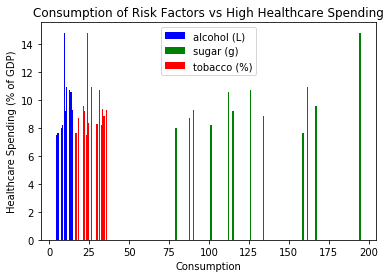

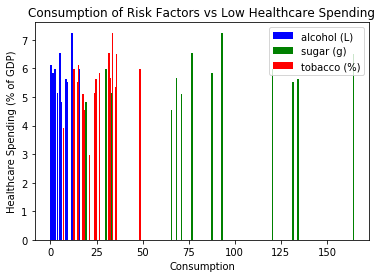

In [52]:
# The code for this was assisted by this website: http://people.duke.edu/~ccc14/pcfb/numpympl/MatplotlibBarPlots.html
y = df_high_spending['health_cost_by_gdp']
ax = plt.subplot()
ax.bar(df_high_spending['alcohol_con'], y,color='b',align='center')
ax.bar(df_high_spending['sugar_con'], y,color='g',align='center')
ax.bar(df_high_spending['tobacco_con'], y,color='r',align='center')
plt.xlabel('Consumption')
plt.ylabel('Healthcare Spending (% of GDP)')
plt.title('Consumption of Risk Factors vs High Healthcare Spending')
ax.legend(('alcohol (L)', 'sugar (g)', 'tobacco (%)'))
plt.show()


y2 = df_low_spending['health_cost_by_gdp']
ax = plt.subplot()
ax.bar(df_low_spending['alcohol_con'], y2,color='b',align='center')
ax.bar(df_low_spending['sugar_con'], y2,color='g',align='center')
ax.bar(df_low_spending['tobacco_con'], y2,color='r',align='center')
plt.xlabel('Consumption')
plt.ylabel('Healthcare Spending (% of GDP)')
plt.title('Consumption of Risk Factors vs Low Healthcare Spending')
ax.legend(('alcohol (L)', 'sugar (g)', 'tobacco (%)'))
plt.show()

### Analysis: 

Based on the comparison of the graphs between low spending countries and high spending countries, there seems to be correlation, albeit small, between the consumption of risk factors and a country's healthcare spending. 

#### Data is separated by individual healthcare costs (both high and low)

In [14]:
df_high_costs = df_clean.query('cost_per_person > 225.36')
df_low_costs = df_clean.query('cost_per_person <= 225.36')

df_high_costs.groupby('cost_per_person')['alcohol_con', 'sugar_con', 'tobacco_con'].mean()

,alcohol_con,sugar_con,tobacco_con
cost_per_person,,,
316.34,5.55,158.90,16.8
337.20,8.14,101.37,32.6
377.50,0.25,76.71,14.7
395.87,8.42,134.25,24.7
1185.94,14.55,90.41,35.8
1204.47,11.62,93.15,33.7
1846.88,10.02,126.03,24.8
2054.23,13.37,112.33,35.7
2249.07,9.77,167.12,21.6


In [16]:
df_low_costs.groupby('cost_per_person')['alcohol_con', 'sugar_con', 'tobacco_con'].mean()

,alcohol_con,sugar_con,tobacco_con
cost_per_person,,,
13.07,2.38,30.14,12.8
14.79,0.06,76.71,21.1
17.80,12.28,30.14,7.1
21.06,2.59,65.75,18.6
22.39,3.77,32.88,24.3
25.03,4.77,21.92,23.6
54.09,5.91,19.18,31.8
59.70,5.12,76.71,31.7
73.60,0.37,76.71,15.1


#### These bar graphs show how the consumption of risk factors affect an individual's healthcare costs

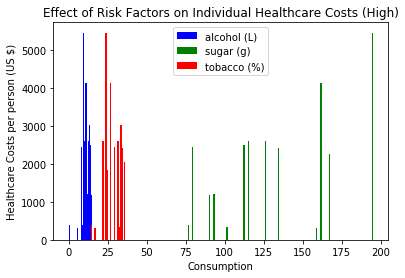

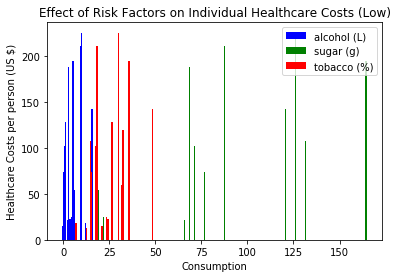

In [54]:
y = df_high_costs['cost_per_person']
ax = plt.subplot()
ax.bar(df_high_costs['alcohol_con'], y,color='b',align='center')
ax.bar(df_high_costs['sugar_con'], y,color='g',align='center')
ax.bar(df_high_costs['tobacco_con'], y,color='r',align='center')
plt.xlabel('Consumption')
plt.ylabel('Healthcare Costs per person (US $)')
plt.title('Effect of Risk Factors on Individual Healthcare Costs (High)')
ax.legend(('alcohol (L)', 'sugar (g)', 'tobacco (%)'))
plt.show()

y2 = df_low_costs['cost_per_person']
ax = plt.subplot()
ax.bar(df_low_costs['alcohol_con'], y2,color='b',align='center')
ax.bar(df_low_costs['sugar_con'], y2,color='g',align='center')
ax.bar(df_low_costs['tobacco_con'], y2,color='r',align='center')
plt.xlabel('Consumption')
plt.ylabel('Healthcare Costs per person (US $)')
plt.title('Effect of Risk Factors on Individual Healthcare Costs (Low)')
ax.legend(('alcohol (L)', 'sugar (g)', 'tobacco (%)'))
plt.show()

### Analysis:

There seems to be a correlation between risk factor consumption and individual healthcare costs based on the higher rates of consumption in the first graph with high costs.

### Question 2: Which health risk factor contributes to healthcare costs the most?

> In this section each risk factor will be compared individually against healthcare costs.

The medians of individual and overall healthcare costs are obtained for comparative purposes.

In [13]:
df_clean['cost_per_person'].median()

225.36

In [14]:
df_clean['health_cost_by_gdp'].median()

7.25

#### Alcohol consumption is compared with healthcare costs

In [15]:
df_clean.groupby('alcohol_con')['cost_per_person', 'health_cost_by_gdp'].mean().head(10)

,cost_per_person,health_cost_by_gdp
alcohol_con,,
0.06,14.79,2.98
0.25,377.50,4.30
0.37,73.60,6.13
1.02,101.81,5.10
1.29,127.78,5.85
2.38,13.07,5.97
2.59,21.06,4.54
2.87,187.74,5.36
3.77,22.39,5.14


In [16]:
df_clean.groupby('alcohol_con')['cost_per_person', 'health_cost_by_gdp'].mean().tail(10)

,cost_per_person,health_cost_by_gdp
alcohol_con,,
10.10,2594.850,9.230
11.06,4140.600,10.910
11.62,1204.470,7.250
12.28,17.800,3.910
12.81,2610.350,10.730
13.37,2536.425,8.445
13.66,2489.200,10.560
14.55,1185.940,9.320
15.30,119.400,5.660


#### A scatter plot is used to visualize any correlation that exists between alcohol consumption and rising costs

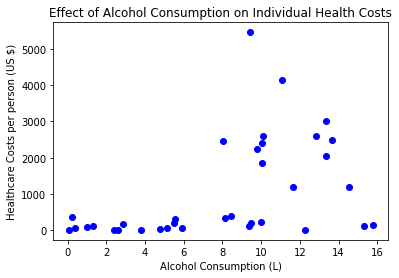

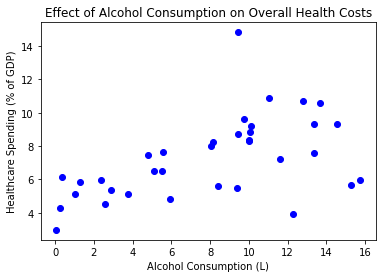

In [45]:
y = df_clean['cost_per_person']
y2 = df_clean['health_cost_by_gdp']
ax = plt.subplot()
ax.scatter(df_clean['alcohol_con'], y, linestyle='-', color='b')
plt.xlabel('Alcohol Consumption (L)')
plt.ylabel('Healthcare Costs per person (US $)')
plt.title('Effect of Alcohol Consumption on Individual Health Costs')
plt.show()

ax = plt.subplot()
ax.scatter(df_clean['alcohol_con'], y2, linestyle='-', color='b')
plt.xlabel('Alcohol Consumption (L)')
plt.ylabel('Healthcare Spending (% of GDP)')
plt.title('Effect of Alcohol Consumption on Overall Health Costs')
plt.show()

### Analysis: 

Individual: Healthcare costs show an increase after 8 liters of alcohol consumption, but don't show a difinitive trend.

Overall: There seems to be a correlation between alcohol consumption and overall healthcare spending.

#### Sugar consumption is compared with healthcare costs

In [17]:
df_clean.groupby('sugar_con')['cost_per_person', 'health_cost_by_gdp'].mean().head(10)

,cost_per_person,health_cost_by_gdp
sugar_con,,
19.18,54.0900,4.810
21.92,25.0300,7.490
30.14,15.4350,4.940
32.88,22.3900,5.140
65.75,21.0600,4.540
68.49,153.5700,5.510
71.23,101.8100,5.100
76.71,131.3975,4.985
79.45,2453.5400,7.980


In [18]:
df_clean.groupby('sugar_con')['cost_per_person', 'health_cost_by_gdp'].mean().tail(10)

,cost_per_person,health_cost_by_gdp
sugar_con,,
115.07,2594.850000,9.230000
120.55,142.050000,5.990000
126.03,1560.863333,9.136667
131.51,107.500000,5.510000
134.25,1400.470000,7.245000
158.90,316.340000,7.650000
161.64,3579.610000,10.120000
164.38,194.800000,6.500000
167.12,2249.070000,9.600000


#### A scatter plot is used to visualize any correlation that exists between sugar consumption and rising costs

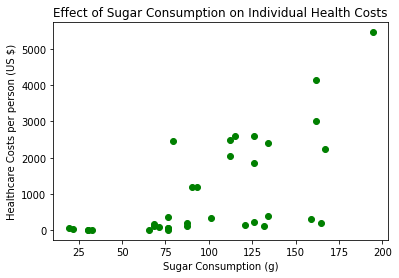

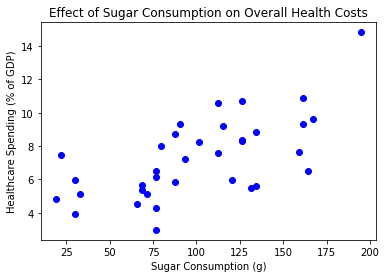

In [46]:
y = df_clean['cost_per_person']
y2 = df_clean['health_cost_by_gdp']

ax = plt.subplot()
ax.scatter(df_clean['sugar_con'], y, linestyle='-', color='g')
plt.xlabel('Sugar Consumption (g)')
plt.ylabel('Healthcare Costs per person (US $)')
plt.title('Effect of Sugar Consumption on Individual Health Costs')
plt.show()

ax = plt.subplot()
ax.scatter(df_clean['sugar_con'], y2, linestyle='-', color='b')
plt.xlabel('Sugar Consumption (g)')
plt.ylabel('Healthcare Spending (% of GDP)')
plt.title('Effect of Sugar Consumption on Overall Health Costs')
plt.show()

### Analysis: 

Individual: The correlation between sugar consumption and individual healthcare costs is salient.

Overall: An increase in sugar consumption also appears to increase a country's overall healthcare expenditures.

In [19]:
df_clean.groupby('tobacco_con')['cost_per_person', 'health_cost_by_gdp'].mean().head(10)

,cost_per_person,health_cost_by_gdp
tobacco_con,,
7.1,17.80,3.91
12.8,13.07,5.97
14.7,377.50,4.30
14.9,107.50,5.51
15.1,73.60,6.13
16.8,316.34,7.65
17.6,101.81,5.10
18.4,210.54,8.72
18.6,21.06,4.54


#### Tobacco consumption is compared with healthcare costs

In [20]:
df_clean.groupby('tobacco_con')['cost_per_person', 'health_cost_by_gdp'].mean().tail(10)

,cost_per_person,health_cost_by_gdp
tobacco_con,,
31.8,54.09,4.81
32.6,228.30,6.95
33.4,3018.62,9.33
33.7,1204.47,7.25
34.3,2405.07,8.87
35.5,187.74,5.36
35.7,2054.23,7.56
35.8,1185.94,9.32
35.9,194.80,6.50


#### A scatter plot is used to visualize any correlation that exists between tobacco consumption and rising costs

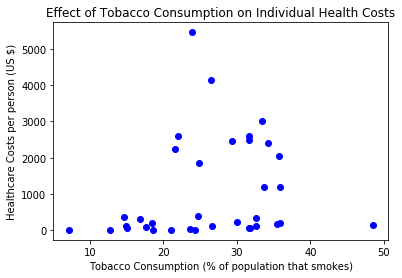

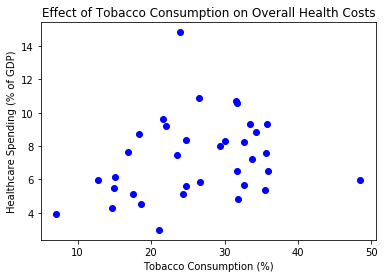

In [55]:
y = df_clean['cost_per_person']
y2 = df_clean['health_cost_by_gdp']

ax = plt.subplot()
ax.scatter(df_clean['tobacco_con'], y, linestyle='-', color='b')
plt.xlabel('Tobacco Consumption (% of population that smokes)')
plt.ylabel('Healthcare Costs per person (US $)')
plt.title('Effect of Tobacco Consumption on Individual Health Costs')
plt.show()

ax = plt.subplot()
ax.scatter(df_clean['tobacco_con'], y2, linestyle='-', color='b')
plt.xlabel('Tobacco Consumption (%)')
plt.ylabel('Healthcare Spending (% of GDP)')
plt.title('Effect of Tobacco Consumption on Overall Health Costs')
plt.show()

### Analysis: 

Individual: Tobacco usage seems to have a weak correlation to healthcare costs. There is an increase in costs after 20% of the population is smoking, but there is no clear connection between usage and costs.

Overall: A country's overall healthcare costs typically appear to increase with more of the population smoking.

<a id='conclusions'></a>
## Conclusions

> Countries that have higher rates of consumption of alcohol, sugar and tobacco typically have higher overall healthcare costs and higher individual costs -- at least past a certain threshold. The risk factor with the strongest correlation of increasing healthcare costs was sugar while the weakest correlation between consumption and cost was smoking tobacco.

> It is important to take into consideration the limitations of this study. One consideration is the small sample size from which the data was drawn. Another consideration is that the population of each country was not factored into the analysis. With a larger data set and statistical adjustments for population the correlations could be rendered differently.   

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255